In [9]:
import re
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from datetime import datetime

In [10]:
# ------------------Import File------------------
lines = None
with open("ssh-honeypot.log", "r") as f:
    lines = f.read().splitlines()

In [11]:
# --------------Create usable data---------------
pattern = r"(?<=\[).+?(?=\])"
data = []
for line in lines:
    try:
        dateStr = re.findall(pattern, line)[0].split(" ", 1)[1]
    except IndexError:
        # if someone used some weird special char
        continue
    dateTimeObj = datetime.strptime(dateStr, '%b %d %H:%M:%S %Y')
    
    otherStuffStr = line.split("] ", 1)[1]
    if otherStuffStr[0].isnumeric():
        splitList = otherStuffStr.split(" ")
        try:
            ipStr = splitList[0]
            username = splitList[1]
            password = splitList[2]
        except IndexError:
            # if someone used some weird special char
            continue
        
        tempList = [dateTimeObj, ipStr, username, password]
        data.append(tempList)

In [4]:
# -----------Create pandas dataframe-------------
df = pd.DataFrame(data, columns = ['Time' , 'IP', 'Username' , 'Password'])

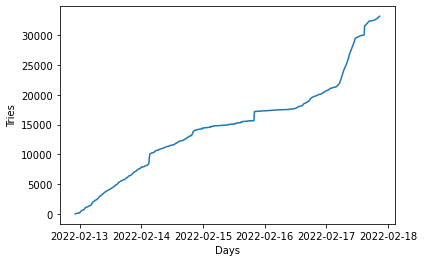

In [5]:
# ---------------Visualize stuff-----------------
plt.plot(df["Time"],[i for i in range(len(df["Time"]))]);
plt.xlabel("Days")
plt.ylabel("Tries");
#lt.savefig("images/requestDistribution.jpg", dpi=300)

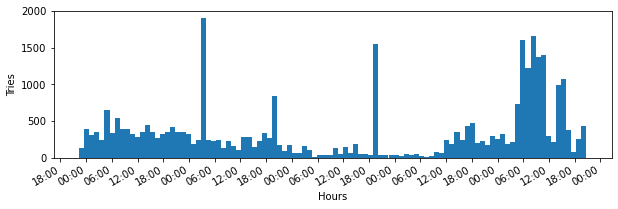

In [8]:
fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 6)
h_fmt = mdates.DateFormatter("%H:%M")
plt.rcParams["figure.figsize"] = (10,3)
plt.hist(df["Time"], bins=100);
fig.autofmt_xdate()
plt.xlabel("Hours")
plt.ylabel("Tries")
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
#plt.savefig("images/requestOverDays.jpg", dpi=300)

In [7]:
passwords = df["Password"].value_counts()
passwords.to_json("passwordCount.json")